In [1]:
#imports of the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import sklearn.metrics
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score , recall_score, f1_score ,classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from autofeatselect import CorrelationCalculator, FeatureSelector, AutoFeatureSelect
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import joblib 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

In [2]:
# Analysis load dataset
df = pd.read_csv("HR_Dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [6]:
df["Departments "].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [8]:
df.skew()

C:\Users\Fathy\AppData\Local\Temp/ipykernel_10004/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


satisfaction_level      -0.476360
last_evaluation         -0.026622
number_project           0.337706
average_montly_hours     0.052842
time_spend_company       1.853319
Work_accident            2.021149
left                     1.230043
promotion_last_5years    6.636968
dtype: float64

In [9]:
df.kurtosis()

C:\Users\Fathy\AppData\Local\Temp/ipykernel_10004/615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


satisfaction_level       -0.670859
last_evaluation          -1.239040
number_project           -0.495478
average_montly_hours     -1.134982
time_spend_company        4.773211
Work_accident             2.085320
left                     -0.487060
promotion_last_5years    42.054957
dtype: float64

# Data Visualization

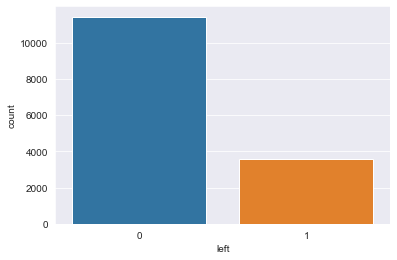

In [10]:
sns.countplot(x="left", data = df);
# 0 for not left is The majority
# 1 for left

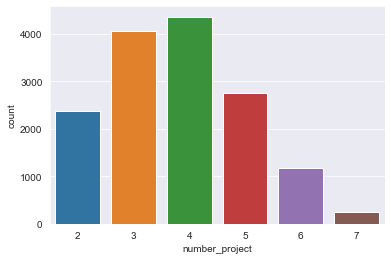

In [11]:
sns.countplot(x="number_project", data = df);

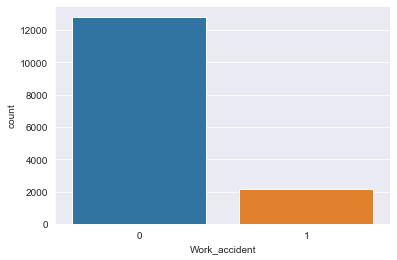

In [12]:
sns.countplot(x="Work_accident", data = df);

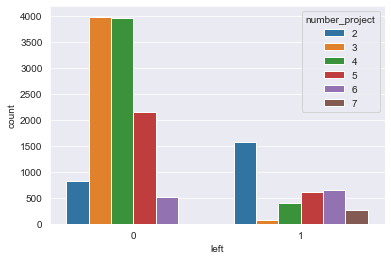

In [13]:
sns.countplot(x="left", data = df, hue = "number_project");

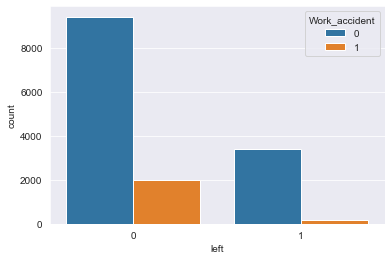

In [14]:
sns.countplot(x="left", data = df, hue = "Work_accident");

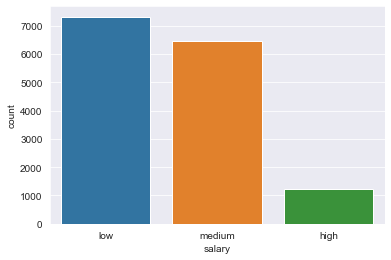

In [15]:
sns.countplot(x="salary" , data=df);

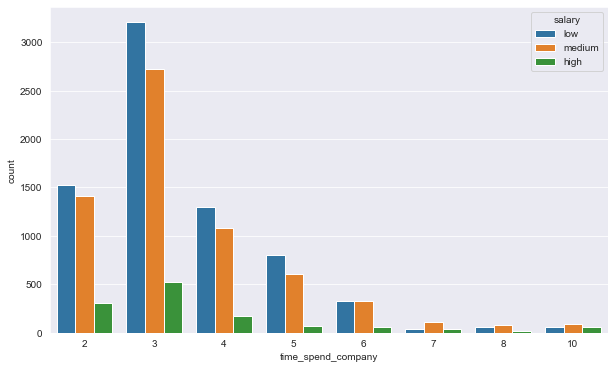

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x="time_spend_company" , data=df , hue="salary");

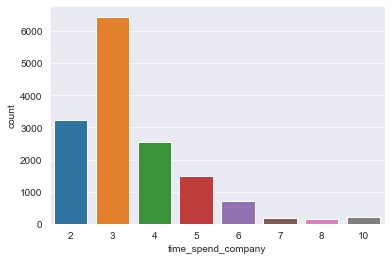

In [17]:
sns.countplot(x="time_spend_company" , data=df );

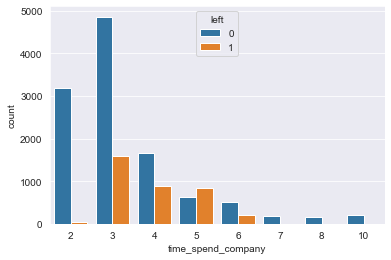

In [18]:
sns.countplot(x="time_spend_company" , data=df , hue="left");

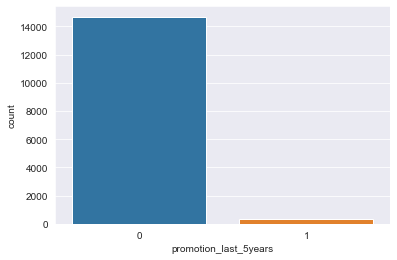

In [19]:
sns.countplot(x="promotion_last_5years" , data=df );

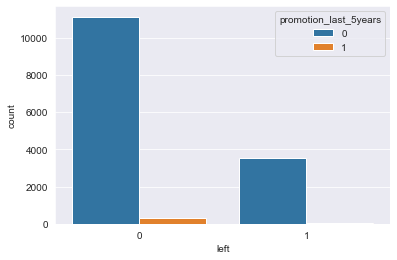

In [20]:
sns.countplot(x="left" , data=df , hue="promotion_last_5years");

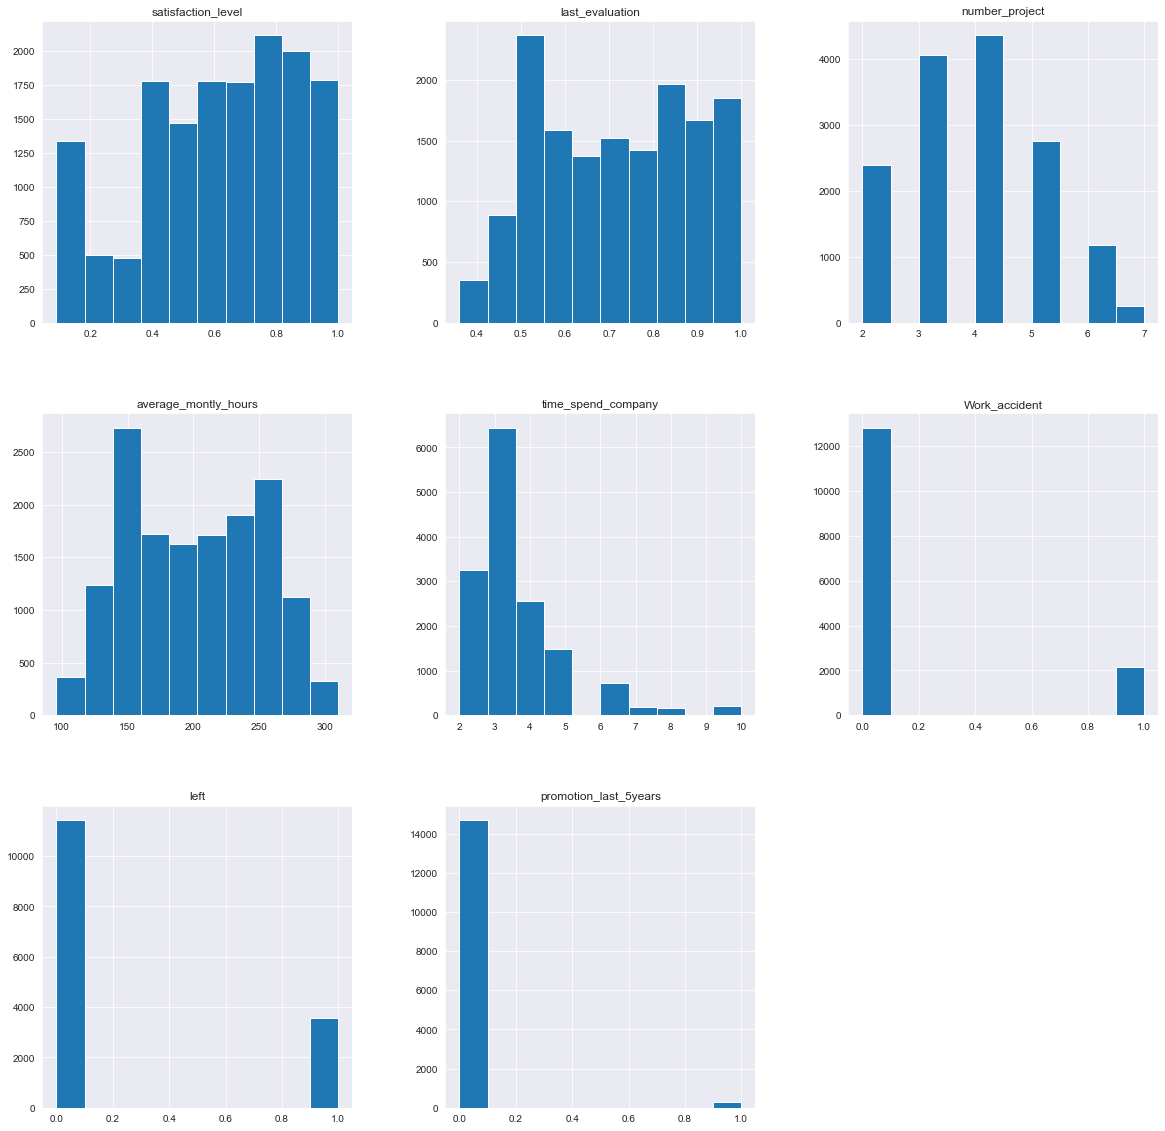

In [21]:
df.hist(figsize=(20, 20));

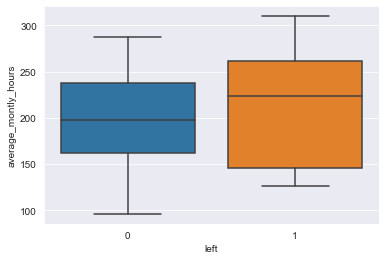

In [51]:
sns.boxplot(x='left', y='average_montly_hours', data=df);

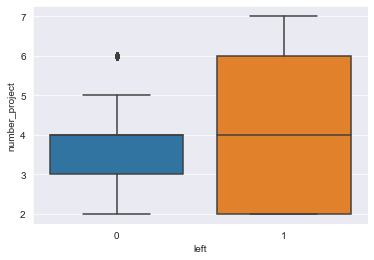

In [52]:
sns.boxplot(x='left', y='number_project', data=df);

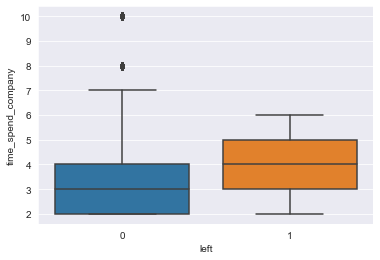

In [53]:
sns.boxplot(x='left', y='time_spend_company', data=df);

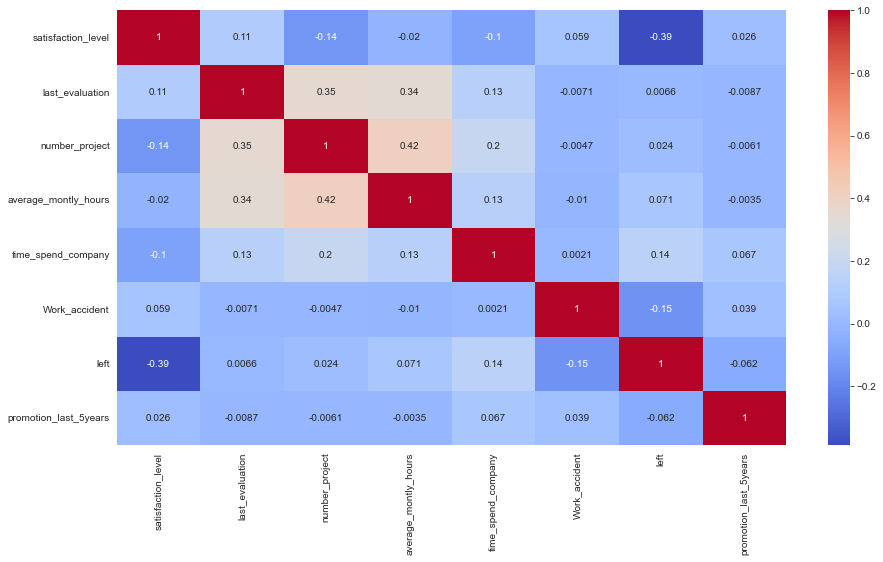

In [22]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True);

# Feature Engineering

In [23]:
df["projects_years"] = df["time_spend_company"] / df["number_project"]

In [24]:
df["month_project"] = df["number_project"] / df["average_montly_hours"]

# Spilt Data

In [25]:
X = df.drop(columns=["left", "Departments "], axis= 1)
y = df["left"]

In [26]:
X.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'projects_years', 'month_project'],
      dtype='object')

In [27]:
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size=.3 , random_state=66)

# Data Preprocessing

In [28]:
num_cols = [col for col in  x_train.columns 
             if x_train[col].dtype in ['float64', 'int64']]

categ_cols = [col for col in  x_train.columns 
                if x_train[col].dtype not in ['float64', 'int64']]

print('Numerical Columns : \n', num_cols)
print('**'*30)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'projects_years', 'month_project']
************************************************************
Categorical Columns : 
 ['salary']


In [29]:
num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_cols)),    
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())])

categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse=False))])

total_pipeline = FeatureUnion(transformer_list=[
                                ('num_pip', num_pipeline),
                                ('categ_pipeline', categ_pipeline)])


x_train = total_pipeline.fit_transform(x_train)
x_test = total_pipeline.transform(x_test)

# `Random forest`

In [30]:
forst = RandomForestClassifier(n_estimators=150, max_depth=4, max_leaf_nodes=20, 
                                    criterion='gini', max_features=1.0, max_samples=0.8)
forst.fit(x_train , y_train)

RandomForestClassifier(max_depth=4, max_features=1.0, max_leaf_nodes=20,
                       max_samples=0.8, n_estimators=150)

In [31]:
y_pred_test = forst.predict(x_test)

In [32]:
class_repo = classification_report(y_test , y_pred_test)
print(class_repo)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3405
           1       0.94      0.91      0.92      1095

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.95      4500
weighted avg       0.96      0.96      0.96      4500



In [33]:
accuracy_score(y_test , y_pred_test)

0.962

confmat_sgd_2 =>
 [[3336   69]
 [ 102  993]]
------------------------------------------------------------


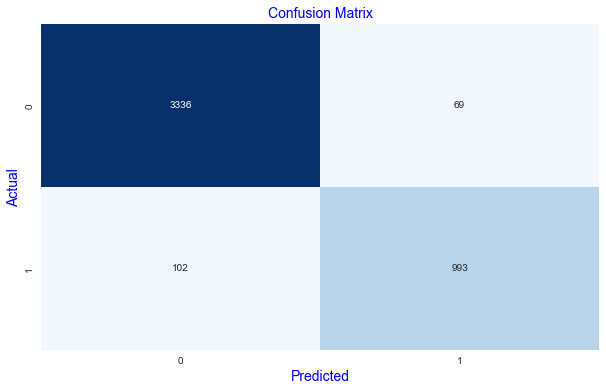

In [34]:
confmat_sgd_2 = confusion_matrix(y_test , y_pred_test)
print('confmat_sgd_2 =>\n', confmat_sgd_2)

print('--'*30)

## Plotting as a HeatMap
plt.figure(figsize=(10, 6))
sns.heatmap(confmat_sgd_2, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()

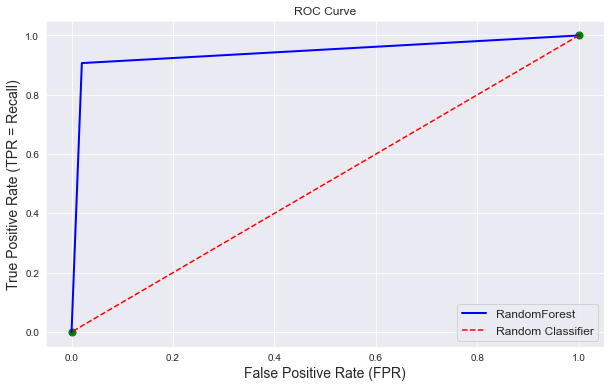

In [35]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_pred_test)


## Plotting
plt.figure(figsize=(10, 6))
plt.plot(fpr_sgd, tpr_sgd, linewidth=2, color='b', label='RandomForest')
plt.plot([1, 0], [1, 0], 'r--', label='Random Classifier')
plt.scatter(0, 0, color='g', s=50)
plt.scatter(1, 1, color='g', s=50)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR = Recall)', fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [36]:
auc_sgd = roc_auc_score(y_test, y_pred_test)
print('Area Under Curve using SGD -- ', auc_sgd)

Area Under Curve using SGD --  0.9432924989439384


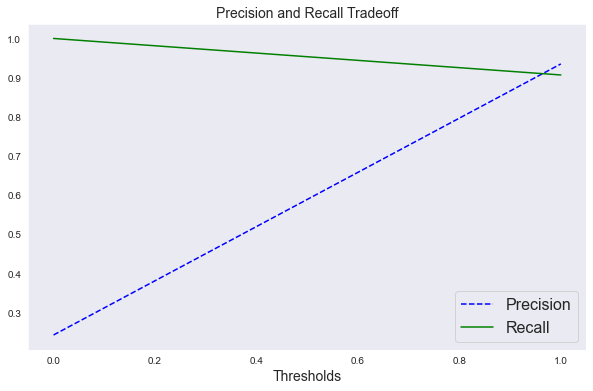

In [37]:
precision_vals, recall_vals, thresholds_vals = precision_recall_curve(y_test, y_pred_test)

plt.figure(figsize=(10, 6))
plt.plot(thresholds_vals, precision_vals[:-1], 'b--', label='Precision')
plt.plot(thresholds_vals, recall_vals[:-1], 'g-', label='Recall')
plt.title('Precision and Recall Tradeoff', fontsize=14)
plt.xlabel('Thresholds', fontsize=14)
plt.grid()
plt.legend(fontsize=16)
plt.show()

In [38]:
joblib.dump(forst, "random_forest.pkl")

['random_forest.pkl']

# ---------------------------------------------------------------------------------------------------------

# KNN

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred_knn = knn.predict(x_test)

In [41]:
class_repo_knn = classification_report(y_test , y_pred_knn)
print(class_repo_knn)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3405
           1       0.92      0.89      0.91      1095

    accuracy                           0.96      4500
   macro avg       0.94      0.93      0.94      4500
weighted avg       0.95      0.96      0.95      4500



In [42]:
accuracy_score(y_test , y_pred_knn)

0.9551111111111111

confmat_sgd_2 =>
 [[3336   69]
 [ 102  993]]
------------------------------------------------------------


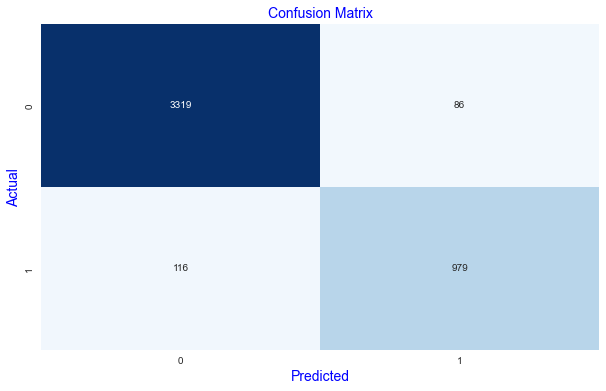

In [43]:
confmat_sgd_1 = confusion_matrix(y_test , y_pred_knn)
print('confmat_sgd_2 =>\n', confmat_sgd_2)

print('--'*30)

## Plotting as a HeatMap
plt.figure(figsize=(10, 6))
sns.heatmap(confmat_sgd_1, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()

In [44]:
auc_sgd_1 = roc_auc_score(y_test, y_pred_knn)
print('Area Under Curve using SGD -- ', auc_sgd_1)

Area Under Curve using SGD --  0.9344034759519644


# ----------------------------------------------------------------------------------